#  Capstone project: Invest in Bogotá

### Import necessary Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

### Define Foursquare Credentials and Version

##### Make sure that you have created a Foursquare developer account and have your credentials handy

In [2]:
CLIENT_ID = '11BKQM0UGVYEPCREYES3GUJMWMUGNOITTXFLFW10RIENRXG0' # your Foursquare ID
CLIENT_SECRET = 'E4F4EDZXYBUTZ3XZ0FZQ0AL4KKO01BUQJZ3MKBXIENLIARCY' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 150
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 11BKQM0UGVYEPCREYES3GUJMWMUGNOITTXFLFW10RIENRXG0
CLIENT_SECRET:E4F4EDZXYBUTZ3XZ0FZQ0AL4KKO01BUQJZ3MKBXIENLIARCY


#### Let's again assume that you are staying at the Conrad hotel. So let's start by converting the Contrad Hotel's address to its latitude and longitude coordinates.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>foursquare_agent</em>, as shown below.

### Here I locate Corferias in Bogotá

In [3]:
address = 'CORFERIAS Bogotá, Bogotá, Colombia'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

4.6304086 -74.09054381559037


<a id="item1"></a>

## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

#### Now, let's assume that it is lunch time, and you are craving Italian food. So, let's define a query to search for Italian food that is within 500 metres from the Conrad Hotel. 

In [4]:
search_query_B = 'Bar'
radius = 1000
print(search_query_B + ' .... OK!')

Bar .... OK!


In [5]:
search_query_R = 'Restaurante'
radius = 1000
print(search_query_R + ' .... OK!')

Restaurante .... OK!


In [6]:
search_query_P = 'Parqueadero'
radius = 1000
print(search_query_P + ' .... OK!')

Parqueadero .... OK!


#### Define the corresponding URL

In [7]:
url_B = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_B, radius, LIMIT)
url_R = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_R, radius, LIMIT)
url_P = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_P, radius, LIMIT)


#### Send the GET Request and examine the results

In [8]:
results_B = requests.get(url_B).json()
results_R = requests.get(url_R).json()
results_P = requests.get(url_P).json()

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [9]:
# assign relevant part of JSON to venues
venues_B = results_B['response']['venues']

# tranform venues into a dataframe
dataframe_B = json_normalize(venues_B)
dataframe_B.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",False,5362bba7498e22fa4c5dd1e9,NaN,CO,NaN,Colombia,NaN,78,[Colombia],"[{'label': 'display', 'lat': 4.629735, 'lng': ...",4.629735,-74.090766,NaN,NaN,NaN,Bar Club Colombia feria del libro,v-1584317618
1,"[{'id': '4bf58dd8d48988d155941735', 'name': 'G...",False,5d44925076efa40008f4e60b,NaN,CO,Bogotá,Colombia,NaN,181,"[Bogotá, Bogotá D.C., Colombia]","[{'label': 'display', 'lat': 4.628805, 'lng': ...",4.628805,-74.090229,NaN,NaN,Bogotá D.C.,Bon Market And Bar,v-1584317618
2,"[{'id': '4bf58dd8d48988d1d5941735', 'name': 'H...",False,5db3a16385b2a5000773703a,NaN,CO,Bogotá,Colombia,NaN,152,"[Bogotá, Bogotá D.C., Colombia]","[{'label': 'display', 'lat': 4.629064, 'lng': ...",4.629064,-74.090272,NaN,NaN,Bogotá D.C.,Four Eleven Bar,v-1584317618
3,"[{'id': '4edd64a0c7ddd24ca188df1a', 'name': 'F...",False,5432ddd1498e591cd8fbaebb,Carrera 40,CO,Bogotá,Colombia,24 A 65,195,"[Carrera 40 (24 A 65), Puente Aranda, Bogotá D...","[{'label': 'display', 'lat': 4.631518783001958...",4.631519,-74.091904,NaN,NaN,Bogotá D.C.,Casa Castelblanco Pescaderia Bar,v-1584317618
4,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,5237486e11d211f593f83504,NaN,CO,NaN,Colombia,NaN,327,[Colombia],"[{'label': 'display', 'lat': 4.630372, 'lng': ...",4.630372,-74.087589,NaN,NaN,NaN,Maderitos Bar-BQ,v-1584317618


#### Define information of interest and filter dataframe

In [10]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_B = ['name', 'categories'] + [col for col in dataframe_B.columns if col.startswith('location.')] + ['id']
dataframe_filtered_B = dataframe_B.loc[:, filtered_columns_B]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_B['categories'] = dataframe_filtered_B.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_B.columns = [column.split('.')[-1] for column in dataframe_filtered_B.columns]

dataframe_filtered_B

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Bar Club Colombia feria del libro,Bar,NaN,CO,NaN,Colombia,NaN,78,[Colombia],"[{'label': 'display', 'lat': 4.629735, 'lng': ...",4.629735,-74.090766,NaN,NaN,NaN,5362bba7498e22fa4c5dd1e9
1,Bon Market And Bar,Gastropub,NaN,CO,Bogotá,Colombia,NaN,181,"[Bogotá, Bogotá D.C., Colombia]","[{'label': 'display', 'lat': 4.628805, 'lng': ...",4.628805,-74.090229,NaN,NaN,Bogotá D.C.,5d44925076efa40008f4e60b
2,Four Eleven Bar,Hotel Bar,NaN,CO,Bogotá,Colombia,NaN,152,"[Bogotá, Bogotá D.C., Colombia]","[{'label': 'display', 'lat': 4.629064, 'lng': ...",4.629064,-74.090272,NaN,NaN,Bogotá D.C.,5db3a16385b2a5000773703a
3,Casa Castelblanco Pescaderia Bar,Fish & Chips Shop,Carrera 40,CO,Bogotá,Colombia,24 A 65,195,"[Carrera 40 (24 A 65), Puente Aranda, Bogotá D...","[{'label': 'display', 'lat': 4.631518783001958...",4.631519,-74.091904,NaN,NaN,Bogotá D.C.,5432ddd1498e591cd8fbaebb
4,Maderitos Bar-BQ,Restaurant,NaN,CO,NaN,Colombia,NaN,327,[Colombia],"[{'label': 'display', 'lat': 4.630372, 'lng': ...",4.630372,-74.087589,NaN,NaN,NaN,5237486e11d211f593f83504
5,Idols Coffee & Bar,Bar,NaN,CO,NaN,Colombia,NaN,399,[Colombia],"[{'label': 'display', 'lat': 4.630602359771728...",4.630602,-74.094139,NaN,NaN,NaN,53177692498e5d9cb878f1e9
6,Cafe - Bar Goyeneche,Bar,NaN,CO,NaN,Colombia,NaN,374,[Colombia],"[{'label': 'display', 'lat': 4.62881433991951,...",4.628814,-74.087567,NaN,NaN,NaN,52f6ea79498effed2f6f8c87
7,Grand Deluxe Café Bar,Café,NaN,CO,NaN,Colombia,NaN,452,[Colombia],"[{'label': 'display', 'lat': 4.632464484765723...",4.632464,-74.094066,NaN,NaN,NaN,51816f7a498ea211c363539d
8,Bar Azul,Bar,Carrera 37 # 25b-38,CO,Bogotá,Colombia,NaN,778,"[Carrera 37 # 25b-38, Bogotá, Bogotá D.C., Col...","[{'label': 'display', 'lat': 4.6357164, 'lng':...",4.635716,-74.085972,NaN,NaN,Bogotá D.C.,4ee2d2599adf3982fdefc233
9,Café Bar Arábigos,Café,NaN,CO,Bogotá,Colombia,NaN,434,"[Bogotá, Bogotá D.C., Colombia]","[{'label': 'display', 'lat': 4.63092632741604,...",4.630926,-74.086667,NaN,NaN,Bogotá D.C.,4e73c047a8095a7c427221a2


In [11]:
# assign relevant part of JSON to venues
venues_R = results_R['response']['venues']

# tranform venues into a dataframe
dataframe_R = json_normalize(venues_R)
dataframe_R.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",False,4e627c77d164ddd5e5cc6077,Calle 29a Carrera 33a,CO,Bogotá,Colombia,NaN,974,"[Calle 29a Carrera 33a, Bogotá, Bogotá D.C., C...","[{'label': 'display', 'lat': 4.631687656483304...",4.631688,-74.081855,NaN,NaN,Bogotá D.C.,Donde Juancho D.J. Restaurante Fruteria,v-1584317619
1,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,50edb299e4b01ac93881bd28,NaN,CO,NaN,Colombia,NaN,330,[Colombia],"[{'label': 'display', 'lat': 4.632709404365846...",4.632709,-74.092420,NaN,NaN,NaN,Restaurante Kim San,v-1584317619
2,[],False,4e739e6862e1a77aace5d5a7,Kra 40,CO,Bogotá,Colombia,Av. Americas,193,"[Kra 40 (Av. Americas), Bogotá, Bogotá D.C., C...","[{'label': 'display', 'lat': 4.631907146110574...",4.631907,-74.091428,NaN,NaN,Bogotá D.C.,Restaurante Krummer Express,v-1584317619
3,"[{'id': '4bf58dd8d48988d1be941735', 'name': 'L...",False,4c7aa9b081bca0939a240115,Carrera 33,CO,Bogotá,Colombia,NaN,594,"[Carrera 33, Bogotá, Bogotá D.C., Colombia]","[{'label': 'display', 'lat': 4.627852, 'lng': ...",4.627852,-74.085840,NaN,NaN,Bogotá D.C.,Restaurante El Poblado,v-1584317619
4,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,5202a468498e1e179bd6d4df,NaN,CO,NaN,Colombia,NaN,308,[Colombia],"[{'label': 'display', 'lat': 4.631339267590929...",4.631339,-74.093166,NaN,NaN,NaN,Restaurante Galeria Colombia,v-1584317619


#### Define information of interest and filter dataframe

In [12]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_R = ['name', 'categories'] + [col for col in dataframe_R.columns if col.startswith('location.')] + ['id']
dataframe_filtered_R = dataframe_R.loc[:, filtered_columns_R]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_R['categories'] = dataframe_filtered_R.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_R.columns = [column.split('.')[-1] for column in dataframe_filtered_R.columns]

dataframe_filtered_R

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Donde Juancho D.J. Restaurante Fruteria,Diner,Calle 29a Carrera 33a,CO,Bogotá,Colombia,NaN,974,"[Calle 29a Carrera 33a, Bogotá, Bogotá D.C., C...","[{'label': 'display', 'lat': 4.631687656483304...",4.631688,-74.081855,NaN,NaN,Bogotá D.C.,4e627c77d164ddd5e5cc6077
1,Restaurante Kim San,Chinese Restaurant,NaN,CO,NaN,Colombia,NaN,330,[Colombia],"[{'label': 'display', 'lat': 4.632709404365846...",4.632709,-74.092420,NaN,NaN,NaN,50edb299e4b01ac93881bd28
2,Restaurante Krummer Express,None,Kra 40,CO,Bogotá,Colombia,Av. Americas,193,"[Kra 40 (Av. Americas), Bogotá, Bogotá D.C., C...","[{'label': 'display', 'lat': 4.631907146110574...",4.631907,-74.091428,NaN,NaN,Bogotá D.C.,4e739e6862e1a77aace5d5a7
3,Restaurante El Poblado,Latin American Restaurant,Carrera 33,CO,Bogotá,Colombia,NaN,594,"[Carrera 33, Bogotá, Bogotá D.C., Colombia]","[{'label': 'display', 'lat': 4.627852, 'lng': ...",4.627852,-74.085840,NaN,NaN,Bogotá D.C.,4c7aa9b081bca0939a240115
4,Restaurante Galeria Colombia,Restaurant,NaN,CO,NaN,Colombia,NaN,308,[Colombia],"[{'label': 'display', 'lat': 4.631339267590929...",4.631339,-74.093166,NaN,NaN,NaN,5202a468498e1e179bd6d4df
5,Restaurante 3/4,Restaurant,Carrera 40 No 25-37,CO,Bogotá,Colombia,NaN,311,"[Carrera 40 No 25-37, Bogotá, Bogotá D.C., Col...","[{'label': 'display', 'lat': 4.633167065296473...",4.633167,-74.090049,NaN,NaN,Bogotá D.C.,4d026edad4f4224ba9fa23e3
6,Restaurante Parrilla Mochuelo's,Restaurant,NaN,CO,NaN,Colombia,NaN,413,[Colombia],"[{'label': 'display', 'lat': 4.633632659912109...",4.633633,-74.088692,NaN,NaN,NaN,51a4fa31498e0d5d4693aa07
7,Arco Restaurante,Restaurant,NaN,CO,Bogotá,Colombia,NaN,92,"[Bogotá, Bogotá D.C., Colombia]","[{'label': 'display', 'lat': 4.631075, 'lng': ...",4.631075,-74.091040,Corferias,NaN,Bogotá D.C.,57cb12f7498ea577c484a4d4
8,Restaurante La Peruana,Latin American Restaurant,NaN,CO,NaN,Colombia,NaN,482,[Colombia],"[{'label': 'display', 'lat': 4.62620903245554,...",4.626209,-74.091623,NaN,NaN,NaN,51ae2854498e9d0a6f3e77a5
9,Restaurante y Pescaderia Quilichao,Caribbean Restaurant,Carrera 34 A # 89 - 17,CO,Bogotá,Colombia,NaN,836,"[Carrera 34 A # 89 - 17, Teusaquillo, Bogotá D...","[{'label': 'display', 'lat': 4.631889487514954...",4.631889,-74.083154,NaN,NaN,Bogotá D.C.,52e56f9b498ed01eaed74e55


In [13]:
# assign relevant part of JSON to venues
venues_P = results_P['response']['venues']

# tranform venues into a dataframe
dataframe_P = json_normalize(venues_P)
dataframe_P.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.state,name,referralId
0,"[{'id': '4c38df4de52ce0d596b336e1', 'name': 'P...",False,50b775dde4b09e9b746b12ae,Cra 32a,CO,Bogotá,Colombia,Cll 25a,640,"[Cra 32a (Cll 25a), Bogotá, Bogotá D.C., Colom...","[{'label': 'display', 'lat': 4.627747548780918...",4.627748,-74.085422,Bogotá D.C.,Parqueadero Cra 32a,v-1584317619
1,"[{'id': '4c38df4de52ce0d596b336e1', 'name': 'P...",False,4e92ef91b8f7cece22f858ff,NaN,CO,NaN,Colombia,NaN,422,[Colombia],"[{'label': 'display', 'lat': 4.629760347345268...",4.629760,-74.094297,NaN,Corferias Parqueadero,v-1584317619
2,"[{'id': '4c38df4de52ce0d596b336e1', 'name': 'P...",False,5b0de9bbe7a237002c10bac4,NaN,CO,Bogotá,Colombia,NaN,622,"[Bogotá, Bogotá D.C., Colombia]","[{'label': 'display', 'lat': 4.633749, 'lng': ...",4.633749,-74.095048,Bogotá D.C.,Parqueadero,v-1584317619
3,"[{'id': '4c38df4de52ce0d596b336e1', 'name': 'P...",False,50f4918de4b081838b3a27a6,NaN,CO,NaN,Colombia,NaN,742,[Colombia],"[{'label': 'display', 'lat': 4.6274643786169, ...",4.627464,-74.084539,NaN,Parqueadero Calle 25 con 32,v-1584317619
4,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",False,50b51542e4b00c7c635a9262,NaN,CO,NaN,Colombia,NaN,1014,[Colombia],"[{'label': 'display', 'lat': 4.637028, 'lng': ...",4.637028,-74.096822,NaN,Parqueadero Park Lavado,v-1584317619


#### Define information of interest and filter dataframe

In [14]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_P = ['name', 'categories'] + [col for col in dataframe_P.columns if col.startswith('location.')] + ['id']
dataframe_filtered_P = dataframe_P.loc[:, filtered_columns_P]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_P['categories'] = dataframe_filtered_P.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_P.columns = [column.split('.')[-1] for column in dataframe_filtered_P.columns]

dataframe_filtered_P

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,state,id
0,Parqueadero Cra 32a,Parking,Cra 32a,CO,Bogotá,Colombia,Cll 25a,640,"[Cra 32a (Cll 25a), Bogotá, Bogotá D.C., Colom...","[{'label': 'display', 'lat': 4.627747548780918...",4.627748,-74.085422,Bogotá D.C.,50b775dde4b09e9b746b12ae
1,Corferias Parqueadero,Parking,NaN,CO,NaN,Colombia,NaN,422,[Colombia],"[{'label': 'display', 'lat': 4.629760347345268...",4.629760,-74.094297,NaN,4e92ef91b8f7cece22f858ff
2,Parqueadero,Parking,NaN,CO,Bogotá,Colombia,NaN,622,"[Bogotá, Bogotá D.C., Colombia]","[{'label': 'display', 'lat': 4.633749, 'lng': ...",4.633749,-74.095048,Bogotá D.C.,5b0de9bbe7a237002c10bac4
3,Parqueadero Calle 25 con 32,Parking,NaN,CO,NaN,Colombia,NaN,742,[Colombia],"[{'label': 'display', 'lat': 4.6274643786169, ...",4.627464,-74.084539,NaN,50f4918de4b081838b3a27a6
4,Parqueadero Park Lavado,Automotive Shop,NaN,CO,NaN,Colombia,NaN,1014,[Colombia],"[{'label': 'display', 'lat': 4.637028, 'lng': ...",4.637028,-74.096822,NaN,50b51542e4b00c7c635a9262


#### Let's visualize the Italian restaurants that are nearby

In [15]:
dataframe_filtered_B.name

0            Bar Club Colombia feria del libro
1                           Bon Market And Bar
2                              Four Eleven Bar
3             Casa Castelblanco Pescaderia Bar
4                             Maderitos Bar-BQ
5                           Idols Coffee & Bar
6                         Cafe - Bar Goyeneche
7                        Grand Deluxe Café Bar
8                                     Bar Azul
9                            Café Bar Arábigos
10                 Restaurante Maderos Bar B-Q
11                                 Maniram Bar
12                           Barcamp #Cprecife
13               Restaurante Bar Martin Fierro
14                      Rockola Bar Donde Yeyo
15                          Deep Blue Café Bar
16                                     Barmacy
17                          Barnes De Colombia
18                         Barrio Cundinamarca
19    Pista Ciclismo Biblioteca Virgilio Barco
20                                   Barichara
21           

In [16]:
dataframe_filtered_R.name

0            Donde Juancho D.J. Restaurante Fruteria
1                                Restaurante Kim San
2                        Restaurante Krummer Express
3                             Restaurante El Poblado
4                       Restaurante Galeria Colombia
5                                    Restaurante 3/4
6                    Restaurante Parrilla Mochuelo's
7                                   Arco Restaurante
8                             Restaurante La Peruana
9                 Restaurante y Pescaderia Quilichao
10                            Restaurante La Terraza
11                             Restaurante El Sudaka
12                       Restaurante Maderos Bar B-Q
13            restaurante y cafetería Expo-Esperanza
14                                Restaurante texMex
15                                  Restaurante Rico
16                            Restaurante El Deleite
17                         Restaurante El Buen Sabor
18                                Restaurante 

In [17]:
dataframe_filtered_P.name

0            Parqueadero Cra 32a
1          Corferias Parqueadero
2                    Parqueadero
3    Parqueadero Calle 25 con 32
4        Parqueadero Park Lavado
Name: name, dtype: object

## Here is the location of pubs, restaurants and car parks on the map

In [18]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Corferias',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered_B.lat, dataframe_filtered_B.lng, dataframe_filtered_B.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='Corferias',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [19]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Corferias',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered_R.lat, dataframe_filtered_R.lng, dataframe_filtered_R.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [20]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Corferias',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered_P.lat, dataframe_filtered_P.lng, dataframe_filtered_P.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## 1.1. K-means

In [21]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


### Define a function that assigns each datapoint to a cluster

## Each dataset to each business model

In [22]:
x1_B = dataframe_filtered_B['lat']
x2_B = dataframe_filtered_B['lng']

In [23]:
x1_R = dataframe_filtered_R['lat']
x2_R = dataframe_filtered_R['lng']

In [24]:
x1_P = dataframe_filtered_P['lat']
x2_P = dataframe_filtered_P['lng']

#### Define a function that plots the data points along with the cluster centroids

In [25]:
def plot_points(centroids=None, colors='g', figure_title=None, x1_data=None, x2_data=None):
       
    # plot the figure
    fig = plt.figure(figsize=(15, 15))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx', 'yx', 'gx', 'bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1_data, x2_data, s=100, c=colors)
    
    # define the ticks
    xticks = np.linspace(-74.077, -74.09999, 8, endpoint=True)
    yticks = np.linspace(4.61666, 4.64, 8, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    r_xticks = np.around(xticks, decimals=5)
    xlabels = (r_xticks)
    ax.set_xticklabels(xlabels)
    r_yticks = np.around(yticks, decimals=5)
    ylabels = (r_yticks)
    ax.set_yticklabels(ylabels)
    

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


### Bar points scattered

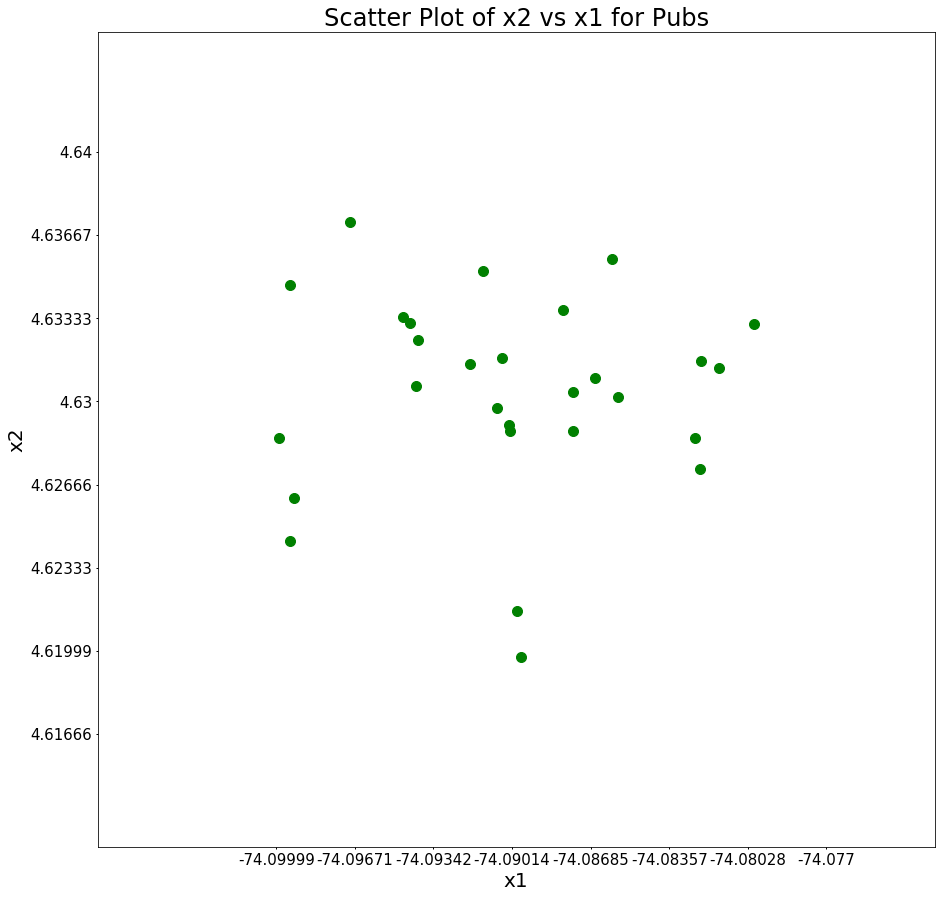

In [26]:
plot_points(figure_title='Scatter Plot of x2 vs x1 for Pubs', x1_data = x2_B, x2_data = x1_B)

### Restaurant points scattered

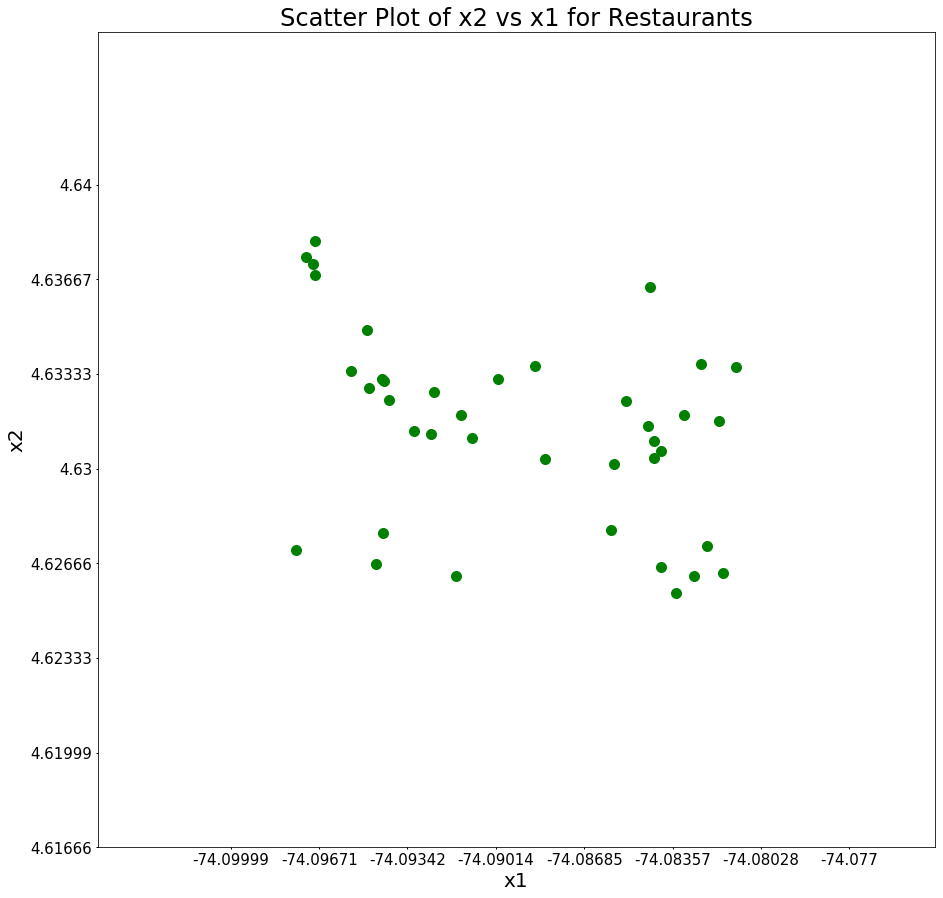

In [27]:
plot_points(figure_title='Scatter Plot of x2 vs x1 for Restaurants', x1_data = x2_R, x2_data = x1_R)

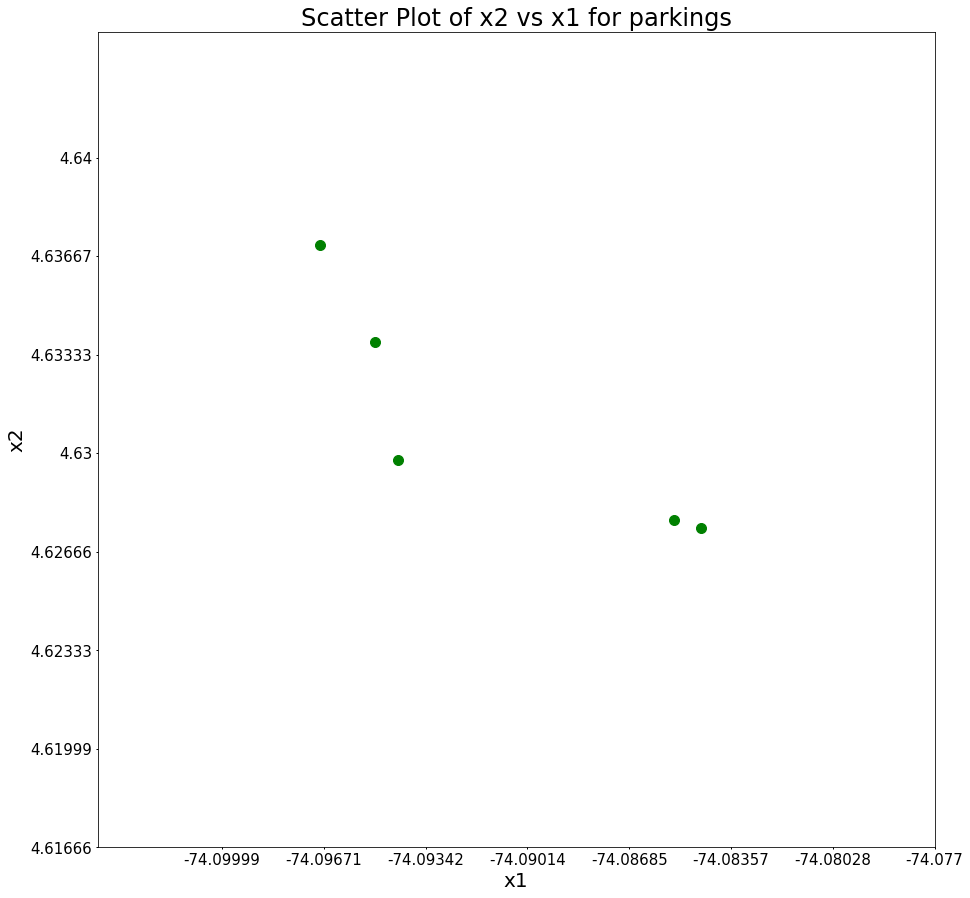

In [28]:
plot_points(figure_title='Scatter Plot of x2 vs x1 for parkings', x1_data = x2_P, x2_data = x1_P)

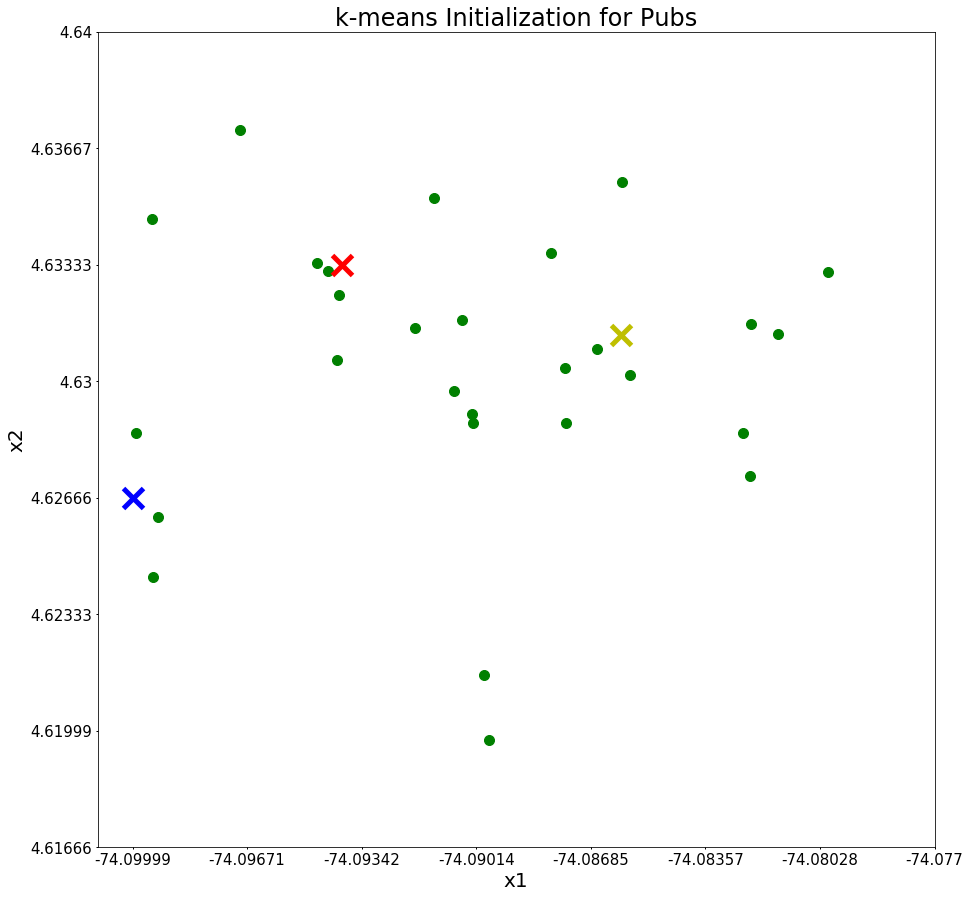

In [29]:
centers = [[-74.09999, 4.62666], [-74.094, 4.63333], [-74.086, 4.63133]]
plot_points(centers, figure_title='k-means Initialization for Pubs', x1_data = x2_B, x2_data = x1_B)

### List to K-means input

In [30]:
X_B = dataframe_filtered_B[['lng', 'lat']].to_numpy() #For Bar
X_B[0:5]

array([[-74.090766  ,   4.629735  ],
       [-74.090229  ,   4.628805  ],
       [-74.090272  ,   4.629064  ],
       [-74.09190372,   4.63151878],
       [-74.087589  ,   4.630372  ]])

In [31]:
X_R = dataframe_filtered_R[['lng', 'lat']].to_numpy() #For Restaurants
X_R[0:5]

array([[-74.08185464,   4.63168766],
       [-74.09241994,   4.6327094 ],
       [-74.09142764,   4.63190715],
       [-74.08584   ,   4.627852  ],
       [-74.0931656 ,   4.63133927]])

In [32]:
X_P = dataframe_filtered_P[['lng', 'lat']].to_numpy() #For Parkings
X_P[0:5]

array([[-74.08542208,   4.62774755],
       [-74.0942975 ,   4.62976035],
       [-74.095048  ,   4.633749  ],
       [-74.08453873,   4.62746438],
       [-74.096822  ,   4.637028  ]])

In [33]:
k_means_B = KMeans(init="random", n_clusters=5, n_init=12)

In [34]:
k_means_B.fit(X_B)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
k_means_labels_B = k_means_B.labels_
k_means_labels_B

array([0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 2, 0, 3, 1, 2, 3, 4, 1, 0, 2, 3,
       3, 2, 2, 4, 3, 4], dtype=int32)

In [36]:
k_means_cluster_centers_B = k_means_B.cluster_centers_
k_means_cluster_centers_B

array([[-74.08866008,   4.63095857],
       [-74.08983955,   4.62067268],
       [-74.08171426,   4.6303801 ],
       [-74.09500313,   4.63381406],
       [-74.09952222,   4.62633778]])

In [37]:
k_means_R = KMeans(init="k-means++", n_clusters=5, n_init=15)

In [38]:
k_means_R.fit(X_R)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
k_means_labels_R = k_means_R.labels_
k_means_labels_R

array([1, 0, 0, 4, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 3, 4, 4, 1,
       1, 4, 3, 4, 3, 1, 0, 3, 1, 2, 3, 1, 2, 3, 0, 0, 4], dtype=int32)

In [40]:
k_means_cluster_centers_R = k_means_R.cluster_centers_
k_means_cluster_centers_R

array([[-74.09210472,   4.63224248],
       [-74.08374494,   4.63211538],
       [-74.09452155,   4.62692664],
       [-74.0963857 ,   4.63630324],
       [-74.08334606,   4.62664237]])

In [41]:
k_means_P = KMeans(init="k-means++", n_clusters=2, n_init=15)

In [42]:
k_means_P.fit(X_P)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
k_means_labels_P = k_means_P.labels_
k_means_labels_P

array([1, 0, 0, 1, 0], dtype=int32)

In [44]:
k_means_cluster_centers_P = k_means_P.cluster_centers_
k_means_cluster_centers_P

array([[-74.09538917,   4.63351245],
       [-74.0849804 ,   4.62760596]])

###  Visualize the k-means results 

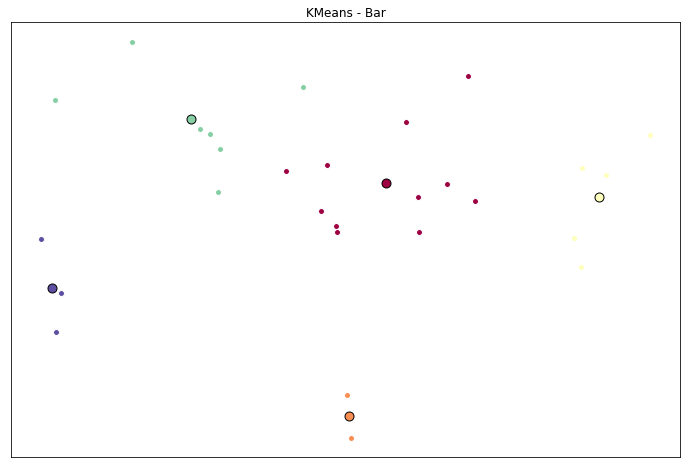

In [45]:


# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 8))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels_B))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,3], [-2, -2], [1, -3], [2, 1], [2, 3]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members_B = (k_means_labels_B == k)
    
    # define the centroid, or cluster center.
    cluster_center_B = k_means_cluster_centers_B[k]
    
    # plot the datapoints with color col.
    ax.plot(X_B[my_members_B, 0], X_B[my_members_B, 1], 'w', markerfacecolor=col, marker='.',markersize=12)
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center_B[0], cluster_center_B[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=9)

# title of the plot
ax.set_title('KMeans - Bar')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()



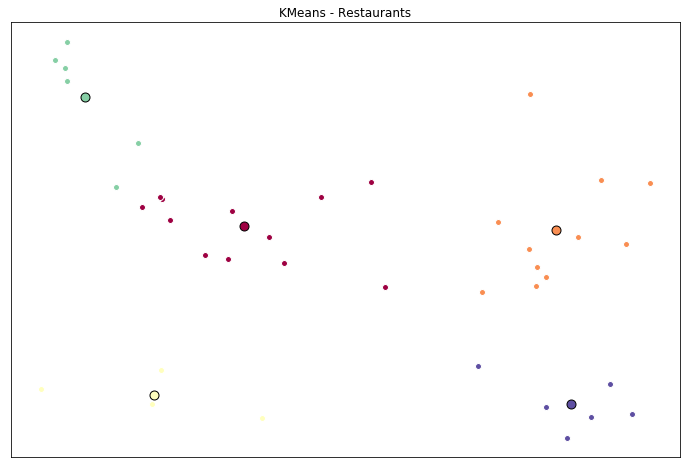

In [46]:


# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 8))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels_R))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1], [1, 3]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members_R = (k_means_labels_R == k)
    
    # define the centroid, or cluster center.
    cluster_center_R = k_means_cluster_centers_R[k]
    
    # plot the datapoints with color col.
    ax.plot(X_R[my_members_R, 0], X_R[my_members_R, 1], 'w', markerfacecolor=col, marker='.',markersize=12)
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center_R[0], cluster_center_R[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=9)

# title of the plot
ax.set_title('KMeans - Restaurants')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()



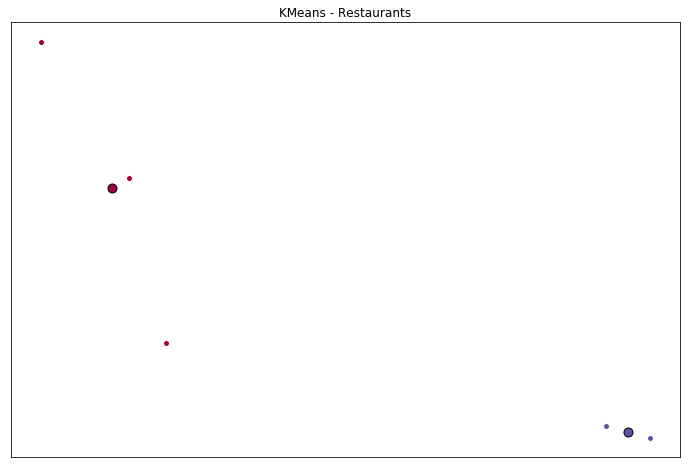

In [47]:


# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 8))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels_P))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1], [1, 3]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members_P = (k_means_labels_P == k)
    
    # define the centroid, or cluster center.
    cluster_center_P = k_means_cluster_centers_P[k]
    
    # plot the datapoints with color col.
    ax.plot(X_P[my_members_P, 0], X_P[my_members_P, 1], 'w', markerfacecolor=col, marker='.', markersize=12)
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center_P[0], cluster_center_P[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=9)

# title of the plot
ax.set_title('KMeans - Restaurants')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()



In [48]:
K_centers_B = k_means_cluster_centers_B.tolist()
K_centers_R = k_means_cluster_centers_R.tolist()
K_centers_P = k_means_cluster_centers_P.tolist()

In [49]:
K_centers_B

[[-74.08866008192392, 4.630958572809721],
 [-74.08983955209578, 4.620672680486894],
 [-74.08171425854479, 4.6303800991149995],
 [-74.09500313449495, 4.633814063140894],
 [-74.0995222208659, 4.626337778727214]]

In [50]:
B = k_means_B.predict(X_B)

In [51]:
R = k_means_R.predict(X_R)

In [52]:
P = k_means_P.predict(X_P)

In [53]:
import math

### Computing the clusters density 

In [54]:
def density(k_means_labels=None, k_means_cluster_centers=None, X=None):
    
    den = []
    dens_means = []
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(set(B))))

    for k in range(len(k_means_cluster_centers)):
        
        dens_means.clear()
                        
        my_members = (k_means_labels == k)
        
        X[my_members, 1]

        # define the centroid, or cluster center.
        cluster_center = k_means_cluster_centers[k]
                
        la = X[my_members, 0]
        lo = X[my_members, 1]   
        
        count = 0
        
        #define how many points in the cluster are
        for ss in range(len(my_members)):
            if my_members[ss] == True:
                count = count + 1
        
        #Calculate distance of each point of the cluster to the centroid
        for i in range(count):

            distance = math.sqrt( ((la[0]-cluster_center[0])**2)+((lo[1]-cluster_center[1])**2) )

            dens_means.append(distance) 
            
            
        #Average of the distances
        avg = sum(dens_means)/(len(dens_means))

        den.append(len(dens_means)/(avg*100))

    return(den)

In [55]:
den_B = density(B,K_centers_B,X_B)
den_B

[36.51933085047557,
 21.38588247183798,
 17.926263334867905,
 43.68249004686565,
 13.77316237867903]

In [56]:
den_R = density(R,K_centers_R,X_R)
den_R

[260.7369794237461,
 57.78064725713214,
 13.303094650734616,
 31.32391107849962,
 24.041113157100806]

In [57]:
den_P = density(P,K_centers_P,X_P)
den_P

[26.857541770606794, 43.12053981022944]

### Visualize each cluster density 

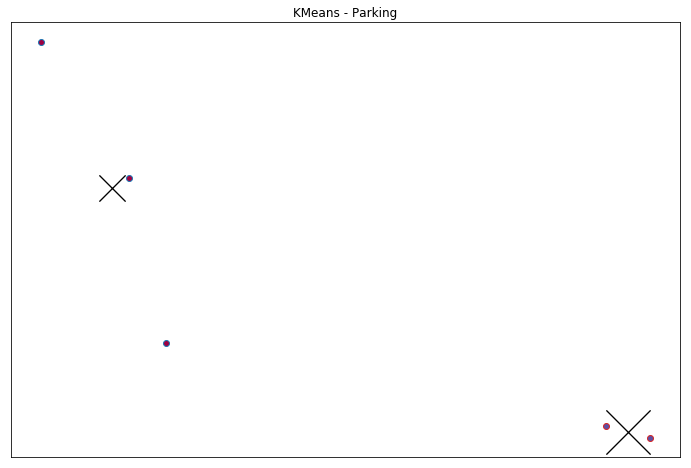

In [58]:

# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 8))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels_P))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

axx = []
ayy = []

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1], [1, 3]])), colors):
    
    axx.clear()
    ayy.clear()

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members_P = (k_means_labels_P == k)
    
    # define the centroid, or cluster center.
    cluster_center_P = k_means_cluster_centers_P[k]
    
    # plot the datapoints with color col.
    ax.plot(X_P[my_members_P, 0], X_P[my_members_P, 1], 'x', markerfacecolor=col, marker='.', markersize=12)
    
    for i in range(len(K_centers_P)):
        axx.append(K_centers_P[i][0])
        ayy.append(K_centers_P[i][1])
        
    # plot the centroids with specified color, but with a darker outline
    for i in range(len(K_centers_P)):
        ax.plot(axx[i], ayy[i], 'o', markerfacecolor=col,  markeredgecolor='k', marker='x', markersize=den_P[i])

# title of the plot
ax.set_title('KMeans - Parking')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()



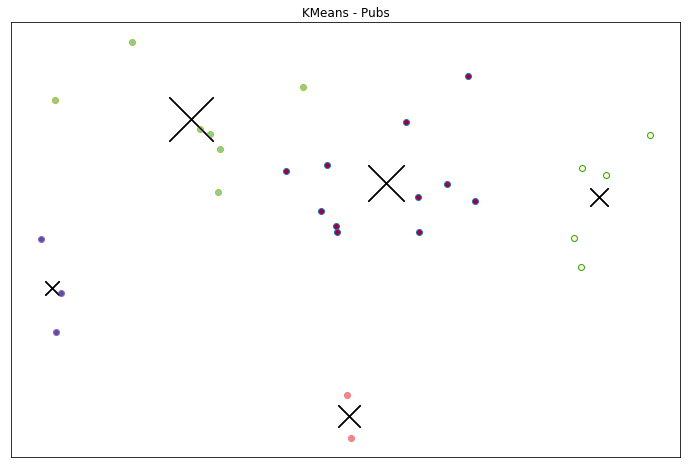

In [59]:

# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 8))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels_B))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

axx = []
ayy = []

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1], [1, 3]])), colors):
    
    axx.clear()
    ayy.clear()

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members_B = (k_means_labels_B == k)
    
    # define the centroid, or cluster center.
    cluster_center_B = k_means_cluster_centers_B[k]
    
    # plot the datapoints with color col.
    ax.plot(X_B[my_members_B, 0], X_B[my_members_B, 1], 'x', markerfacecolor=col, marker='.', markersize=12)
    
    for i in range(len(K_centers_B)):
        axx.append(K_centers_B[i][0])
        ayy.append(K_centers_B[i][1])
        
    # plot the centroids with specified color, but with a darker outline
    for i in range(len(K_centers_B)):
        ax.plot(axx[i], ayy[i], 'o', markerfacecolor=col,  markeredgecolor='k', marker='x', markersize=den_B[i])

# title of the plot
ax.set_title('KMeans - Pubs')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()



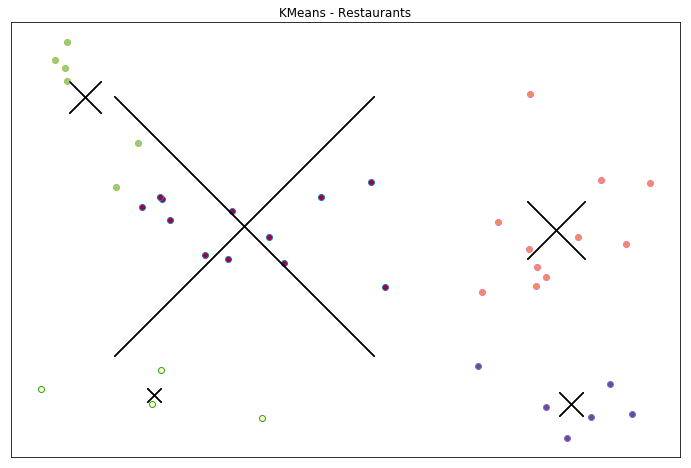

In [60]:

# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 8))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels_R))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

axx = []
ayy = []

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1], [1, 3]])), colors):
    
    axx.clear()
    ayy.clear()

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members_R = (k_means_labels_R == k)
    
    # define the centroid, or cluster center.
    cluster_center_R = k_means_cluster_centers_R[k]
    
    # plot the datapoints with color col.
    ax.plot(X_R[my_members_R, 0], X_R[my_members_R, 1], 'x', markerfacecolor=col, marker='.', markersize=12)
    
    for i in range(len(K_centers_R)):
        axx.append(K_centers_R[i][0])
        ayy.append(K_centers_R[i][1])
        
    # plot the centroids with specified color, but with a darker outline
    for i in range(len(K_centers_R)):
        ax.plot(axx[i], ayy[i], 'o', markerfacecolor=col,  markeredgecolor='k', marker='x', markersize=den_R[i])

# title of the plot
ax.set_title('KMeans - Restaurants')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()



### Visualize all clusters density in one plot 

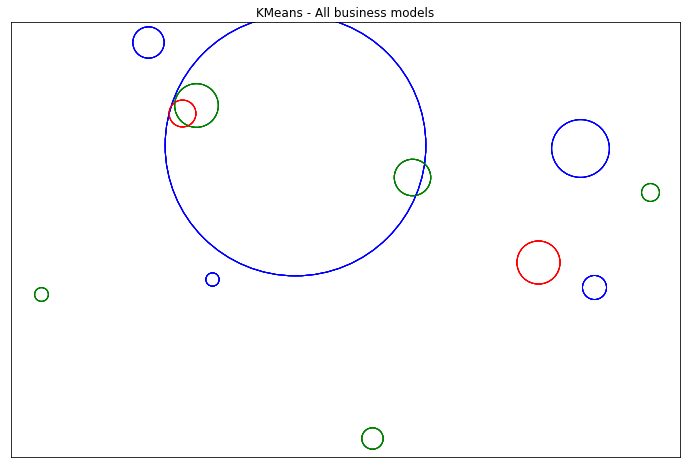

In [62]:

# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 8))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels_R))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

axx = []
ayy = []

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1], [1, 3]])), colors):
    
    axx.clear()
    ayy.clear()    

    
    # define the centroid, or cluster center.
    cluster_center_R = k_means_cluster_centers_R[k]
    
   
    for i in range(len(K_centers_R)):
        axx.append(K_centers_R[i][0])
        ayy.append(K_centers_R[i][1])
        
    # plot the centroids with specified color, but with a darker outline
    for i in range(len(K_centers_R)):
        ax.plot(axx[i], ayy[i], 'o', markerfacecolor="None",  markeredgecolor='b', markersize=den_R[i])
        
    axx.clear()
    ayy.clear()
        
        
    for i in range(len(K_centers_B)):
        axx.append(K_centers_B[i][0])
        ayy.append(K_centers_B[i][1])
        
    # plot the centroids with specified color, but with a darker outline
    for i in range(len(K_centers_B)):
        ax.plot(axx[i], ayy[i], 'o', markerfacecolor="None",  markeredgecolor='g', markersize=den_B[i])
        
    axx.clear()
    ayy.clear()
        
        
    for i in range(len(K_centers_P)):
        axx.append(K_centers_P[i][0])
        ayy.append(K_centers_P[i][1])
        
    # plot the centroids with specified color, but with a darker outline
    for i in range(len(K_centers_P)):
        ax.plot(axx[i], ayy[i], 'o', markerfacecolor="None",  markeredgecolor='r', markersize=den_P[i])
        
        
# title of the plot
ax.set_title('KMeans - All business models')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()

